In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [18]:
csv = "cleandata7.csv"
fulldata = pd.read_csv(csv)
# fulldata.head()

In [4]:
fulldata.dtypes

sale                 object
Day(Report Date)     object
ID                    int64
week                  int64
year                  int64
u                     int64
p                   float64
Lift_DOD            float64
change in p           int64
Lift_retail         float64
Lift_2DOD           float64
Lift_2retail        float64
Size                  int64
Weekday               int64
dtype: object

In [17]:
newdata = pd.read_csv('cleandata7.csv', parse_dates=['Day(Report Date)'])
# newdata.head()

In [6]:
newdata.dtypes

sale                        object
Day(Report Date)    datetime64[ns]
ID                           int64
week                         int64
year                         int64
u                            int64
p                          float64
Lift_DOD                   float64
change in p                  int64
Lift_retail                float64
Lift_2DOD                  float64
Lift_2retail               float64
Size                         int64
Weekday                      int64
dtype: object

[]

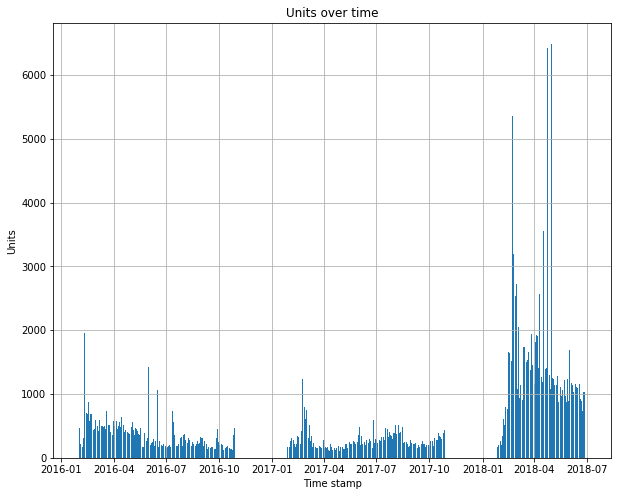

In [10]:
plt.figure(figsize=(10,8))
plt.bar(newdata["Day(Report Date)"], newdata["u"])
plt.title("Units over time")
plt.ylabel("Units")
plt.xlabel("Time stamp")
plt.grid(True)
plt.plot()

In [15]:
newdata.index

RangeIndex(start=0, stop=94330, step=1)

In [ ]:
ts = newdata["u"] 
ts.head(10)

In [16]:
csvfile = "cleandata7.csv"
data = pd.read_csv(csvfile)
# data.head()

In [3]:
data["ID"].size

94330

In [69]:
x = data[["Lift_retail","Size", "p", "week"]]
y = data["u"].values

In [70]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [71]:
# from sklearn.preprocessing import StandardScaler

# # # Create a StandardScater model and fit it to the training data

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)


In [72]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


In [73]:
# n_samples = 5000
# n_features = 3
# x = data[["AUR TY", "size", "WM Week #"]]
# y = data["Units"]
# #y = data["Units"].values.reshape(-1, 1)


model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

# try SGD regressor
# model = linear_model.SGDRegressor()
model.fit(X_train, y_train)

# # try nearest
# from sklearn.neighbors import NearestNeighbors


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({"Predicted": predictions, "Actual": y_test, "Error": predictions - y_test})[["Predicted", "Actual", "Error"]] 
comparison.head(40)

# print(predictions)

,Predicted,Actual,Error
0,8.651127,25,-16.348873
1,18.525177,14,4.525177
2,19.858000,10,9.858000
3,24.264753,5,19.264753
4,11.107923,14,-2.892077
5,9.298344,5,4.298344
6,5.427387,7,-1.572613
7,40.605449,2,38.605449
8,97.541505,77,20.541505
9,3.784000,2,1.784000


[]

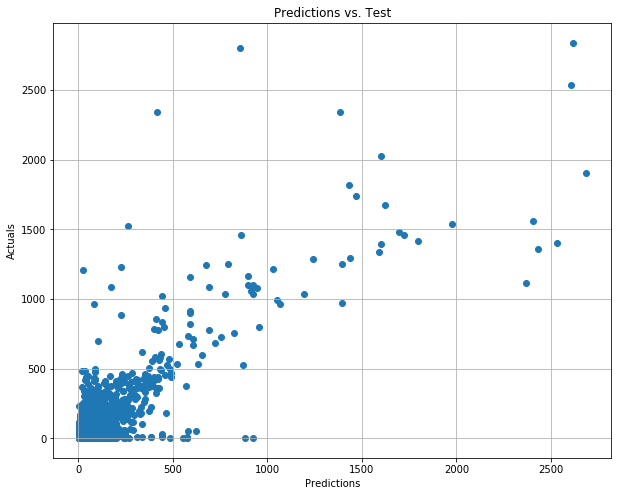

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test)
plt.title("Predictions vs. Test")
plt.ylabel("Actuals")
plt.xlabel("Predictions")
plt.grid(True)
plt.plot()

In [ ]:
print(predictions)

In [ ]:
print(y_test)

Notes from prev test

In [76]:
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7034255739064977


In [78]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(predictions, y_test):
    return np.sqrt(mean_squared_error(predictions, y_test))

In [81]:
error = pd.DataFrame(mean_squared_error(comparison["Predicted"], comparison["Actual"], multioutput='raw_values'))
error

,0
0,1949.829883


In [100]:
weekly_sales = []
for weeks in range (1,26):
    forecast = model.predict([[0.01, 32, 109, weeks]])
    weekly_sales.append(forecast)
weekly_sales

[array([ 133.302]),
 array([ 137.538]),
 array([ 128.621]),
 array([ 115.878]),
 array([ 129.113]),
 array([ 78.851]),
 array([ 33.685]),
 array([ 29.536]),
 array([ 25.133]),
 array([ 22.999]),
 array([ 21.123]),
 array([ 21.097]),
 array([ 19.354]),
 array([ 20.25]),
 array([ 23.008]),
 array([ 24.052]),
 array([ 25.805]),
 array([ 26.592]),
 array([ 28.24]),
 array([ 30.167]),
 array([ 27.345]),
 array([ 26.697]),
 array([ 33.56]),
 array([ 29.287]),
 array([ 26.536])]